In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [13]:
visadf=pd.read_csv('C:/Users/Anuja_PC/OneDrive/Documents/dataFiles/Visadataset.csv')
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [14]:
empDf = visadf["no_of_employees"]
empDf

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

**Box Plot**

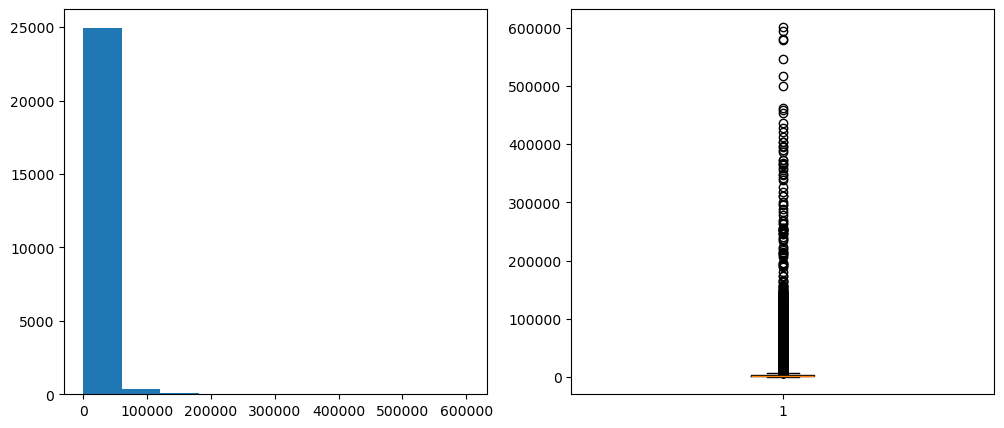

In [45]:
pt.figure(figsize=(12,5))
pt.subplot(1,2,1).hist(empDf,bins=10)
pt.subplot(1,2,2).boxplot(empDf)
pt.show()


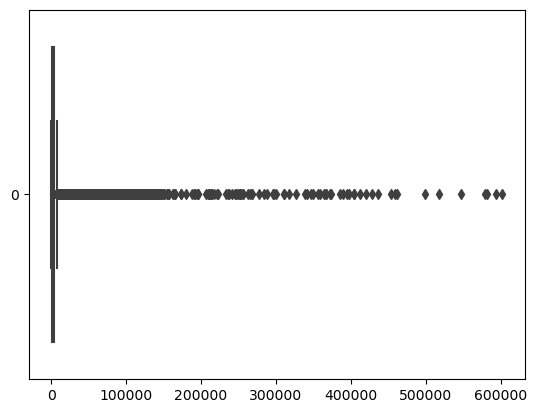

In [25]:
sns.boxplot(empDf,orient='h')
pt.show()

## Finding the outliers ##

In [36]:
q1=np.quantile(empDf,0.25)
q3=np.quantile(empDf,0.75)

q1,q3

(1022.0, 3504.0)

In [37]:
IQR = q3-q1
IQR

2482.0

In [38]:
LB = q1-1.5*IQR  #lower bound
UB = q3+1.5*IQR  #upper bound

LB,UB

(-2701.0, 7227.0)

In [40]:
cond1 = empDf < LB
cond2 = empDf > UB

outliersData=visadf[cond1 | cond2] 
outliersData

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.7300,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25441,EZYV25442,Asia,Master's,N,N,28199,1988,Northeast,97906.7600,Year,Y,Certified
25443,EZYV25444,Africa,Bachelor's,N,N,72892,2007,Northeast,215.1000,Hour,Y,Certified
25455,EZYV25456,South America,Bachelor's,N,N,24335,1993,Midwest,97393.4900,Year,Y,Certified
25464,EZYV25465,Asia,Master's,N,N,48785,1974,South,145102.3600,Year,N,Certified


In [41]:
cond1 = empDf> LB
cond2 = empDf < UB

non_outliersData=visadf[cond1 & cond2]  # non outliers data
non_outliersData

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


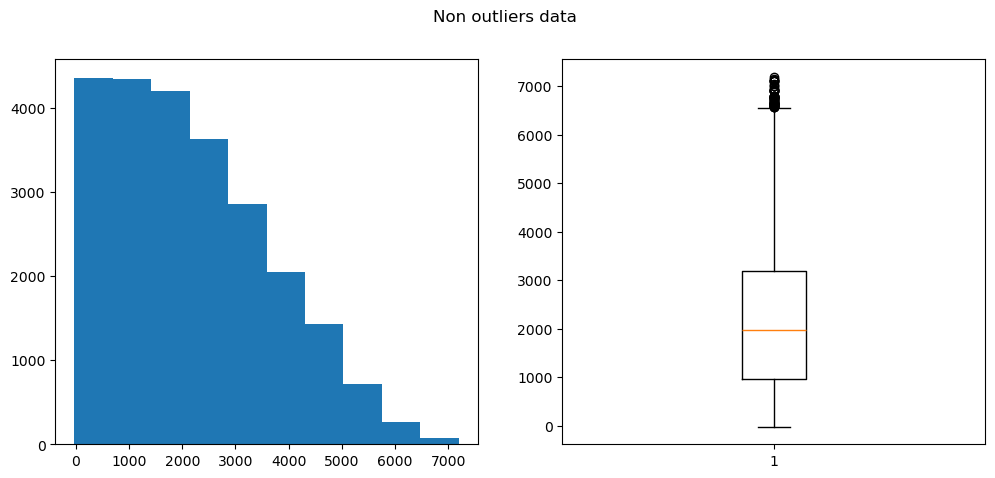

In [42]:
pt.figure(figsize=(12,5))
pt.suptitle("Non outliers data")
pt.subplot(1,2,1).hist(non_outliersData["no_of_employees"])
pt.subplot(1,2,2).boxplot(non_outliersData["no_of_employees"])
pt.show()

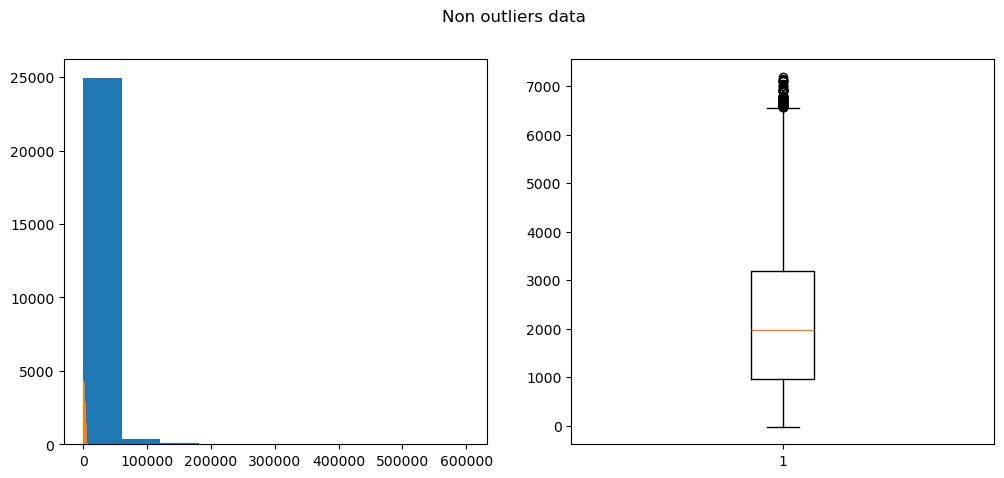

In [44]:
pt.figure(figsize=(12,5))
pt.suptitle("Non outliers data")
pt.subplot(1,2,1).hist(empDf)
pt.subplot(1,2,1).hist(non_outliersData["no_of_employees"])
pt.subplot(1,2,2).boxplot(non_outliersData["no_of_employees"])
pt.show()

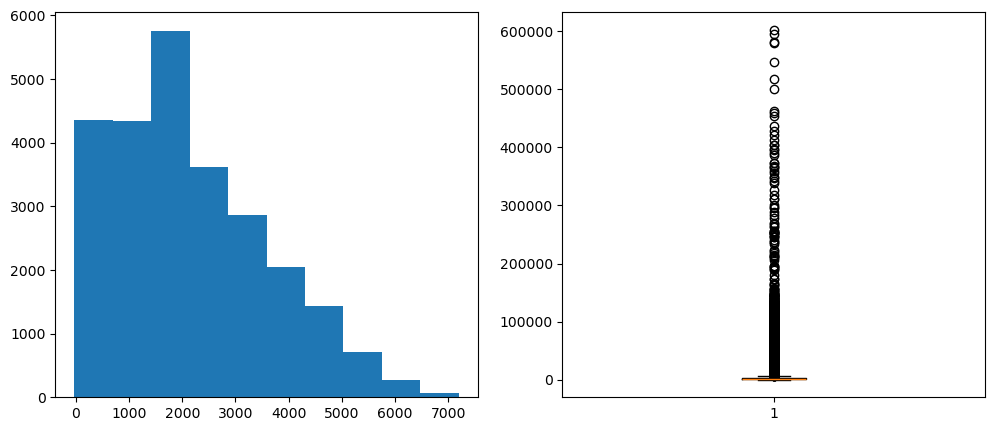

In [47]:
l1= []  #create emply list
mediann=empDf.median() # calculate median
  # iterate through values
for value in empDf.values:
   if value < LB or value > UB:
        l1.append(mediann)
   else:
        l1.append(value)
        
empdf_copy = empDf.copy()
empdf_copy = l1

pt.figure(figsize=(12,5))
pt.subplot(1,2,1).hist(empdf_copy)
pt.subplot(1,2,2).boxplot(empDf)
pt.show()

In [49]:
con1 = empDf< LB 
con2 = empDf>UB
cond = con1 | con2
mediann=empDf.median()
l=np.where(cond,mediann,empDf)
l

array([2109., 2412., 2109., ..., 1121., 1918., 3195.])